# Using the API

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pbxplore as pbx

import pbtools as pbt

print(f"networkx version {nx.__version__}")
print(f"pbxplore version {pbx.__version__}")
print(f"pbtools version {pbt.__version__}")

%matplotlib inline

# Bigger figures for the whole notebook.
plt.rcParams['figure.figsize'] = [30, 20]

networkx version 2.3
pbxplore version 1.3.8
pbtools version 0.1.0


In [2]:
# Get trajectory and topology files.
! bash ../data/small_run.sh

--2019-09-18 17:30:01--  https://raw.githubusercontent.com/pierrepo/PBxplore/master/demo_doc/psi_md_traj.gro
Résolution de ewebproxy.univ-paris-diderot.fr (ewebproxy.univ-paris-diderot.fr)… 81.194.35.225, 2001:660:3301:80fb::225
Connexion à ewebproxy.univ-paris-diderot.fr (ewebproxy.univ-paris-diderot.fr)|81.194.35.225|:3128… connecté.
requête Proxy transmise, en attente de la réponse… 200 OK
Taille : 18630 (18K) [text/plain]
Enregistre : «psi_md_traj.gro.2»

psi_md_traj.gro.2   100%[===================>]  18,19K  --.-KB/s    ds 0s      

2019-09-18 17:30:01 (51,2 MB/s) - «psi_md_traj.gro.2» enregistré [18630/18630]

--2019-09-18 17:30:01--  https://raw.githubusercontent.com/pierrepo/PBxplore/master/demo_doc/psi_md_traj.xtc
Résolution de ewebproxy.univ-paris-diderot.fr (ewebproxy.univ-paris-diderot.fr)… 81.194.35.225, 2001:660:3301:80fb::225
Connexion à ewebproxy.univ-paris-diderot.fr (ewebproxy.univ-paris-diderot.fr)|81.194.35.225|:3128… connecté.
requête Proxy transmise, en attente d

## Assigning the PBs and creating the MI matrix

In [3]:
# Reading the files and assigning Protein Blocks.
trajectory = "psi_md_traj.xtc"
topology = "psi_md_traj.gro"

chains = pbx.chains_from_trajectory(trajectory, topology)

all_sequences = []
for comment, chain in chains:
    dihedrals = chain.get_phi_psi_angles()
    sequence = pbx.assign(dihedrals)
    all_sequences.append(sequence)


Frame 1/225.
Frame 100/225.
Frame 200/225.
Frame 225/225.


In [4]:
# Creating the matrix, might be slow.
MI_matrix = pbt.mutual_information_matrix(all_sequences)
print("Done")

Done


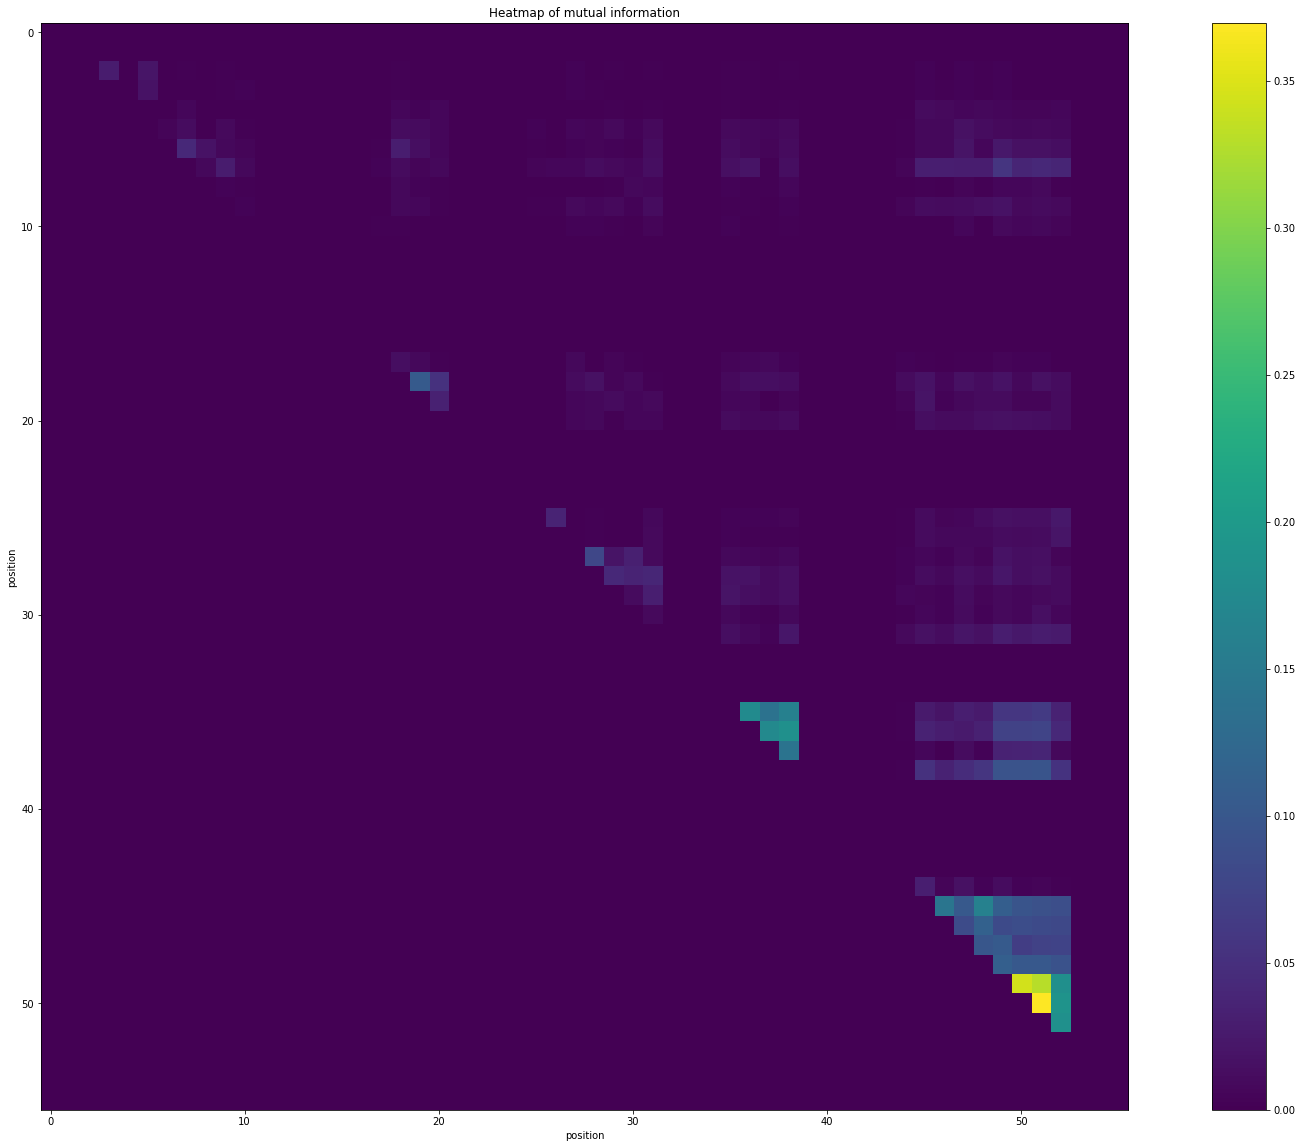

In [5]:
# Getting the heatmap of mutual information.
plt.title("Heatmap of mutual information")
plt.xlabel("position")
plt.ylabel("position")

plt.imshow(MI_matrix)
plt.colorbar()

## Network manipulation

In [6]:
# Creating the network.
PB_graph = pbt.interaction_graph(MI_matrix)

/home/sdv/m2bi/lyang_crosson/.conda/envs/PBTools_dev/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


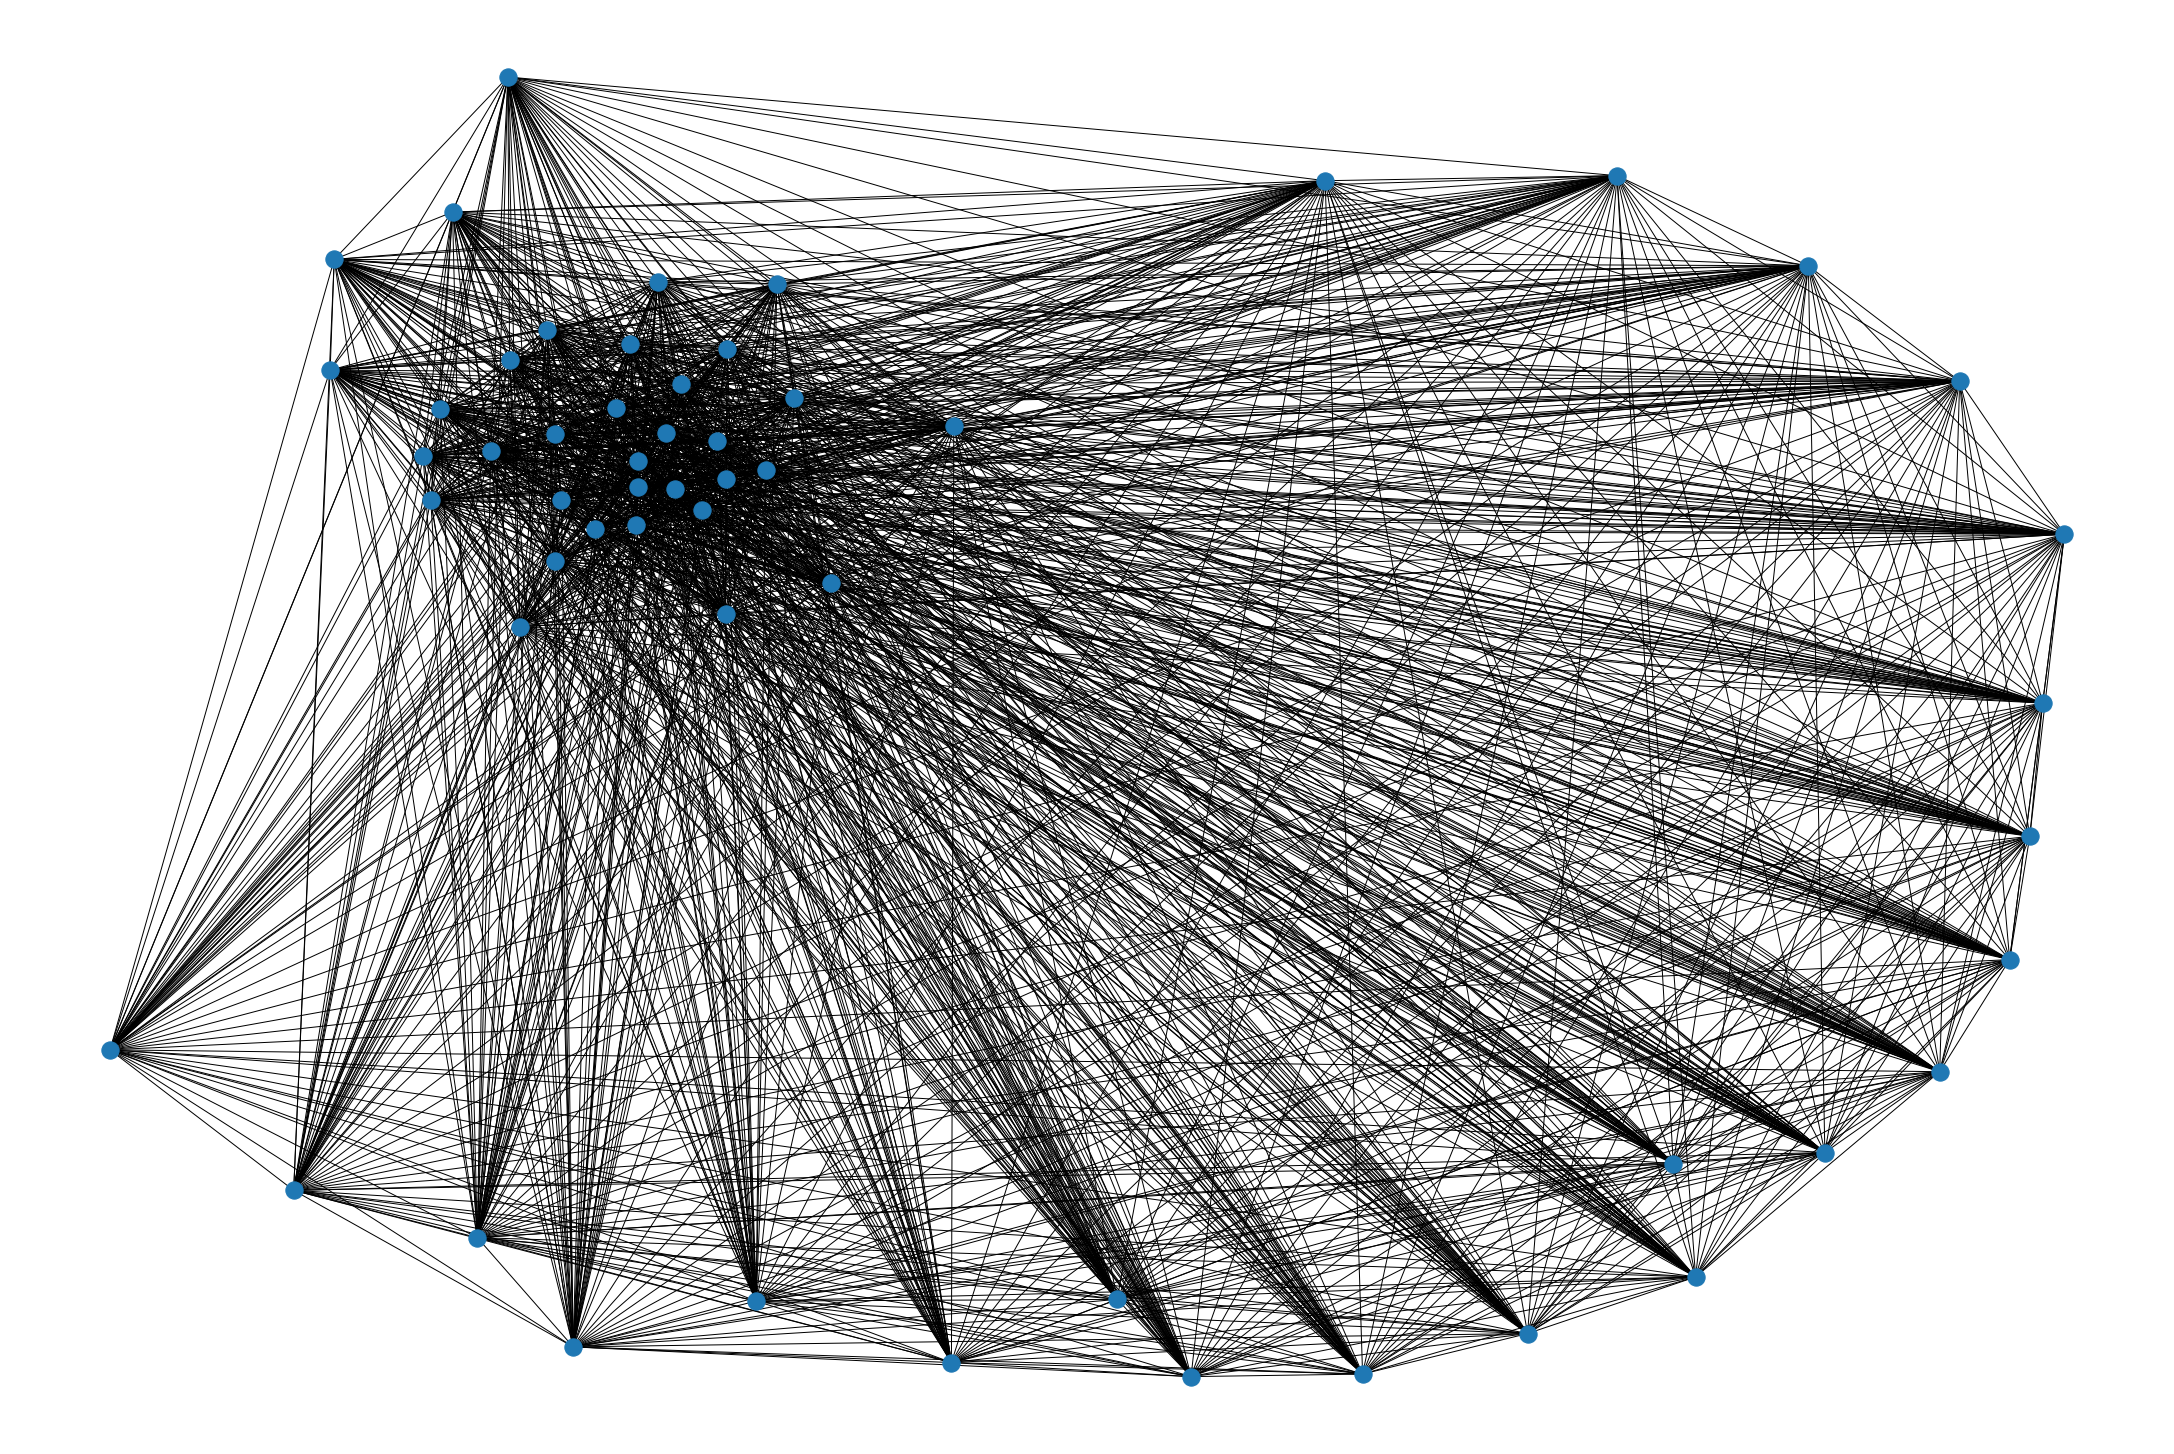

In [7]:
nx.draw(PB_graph)

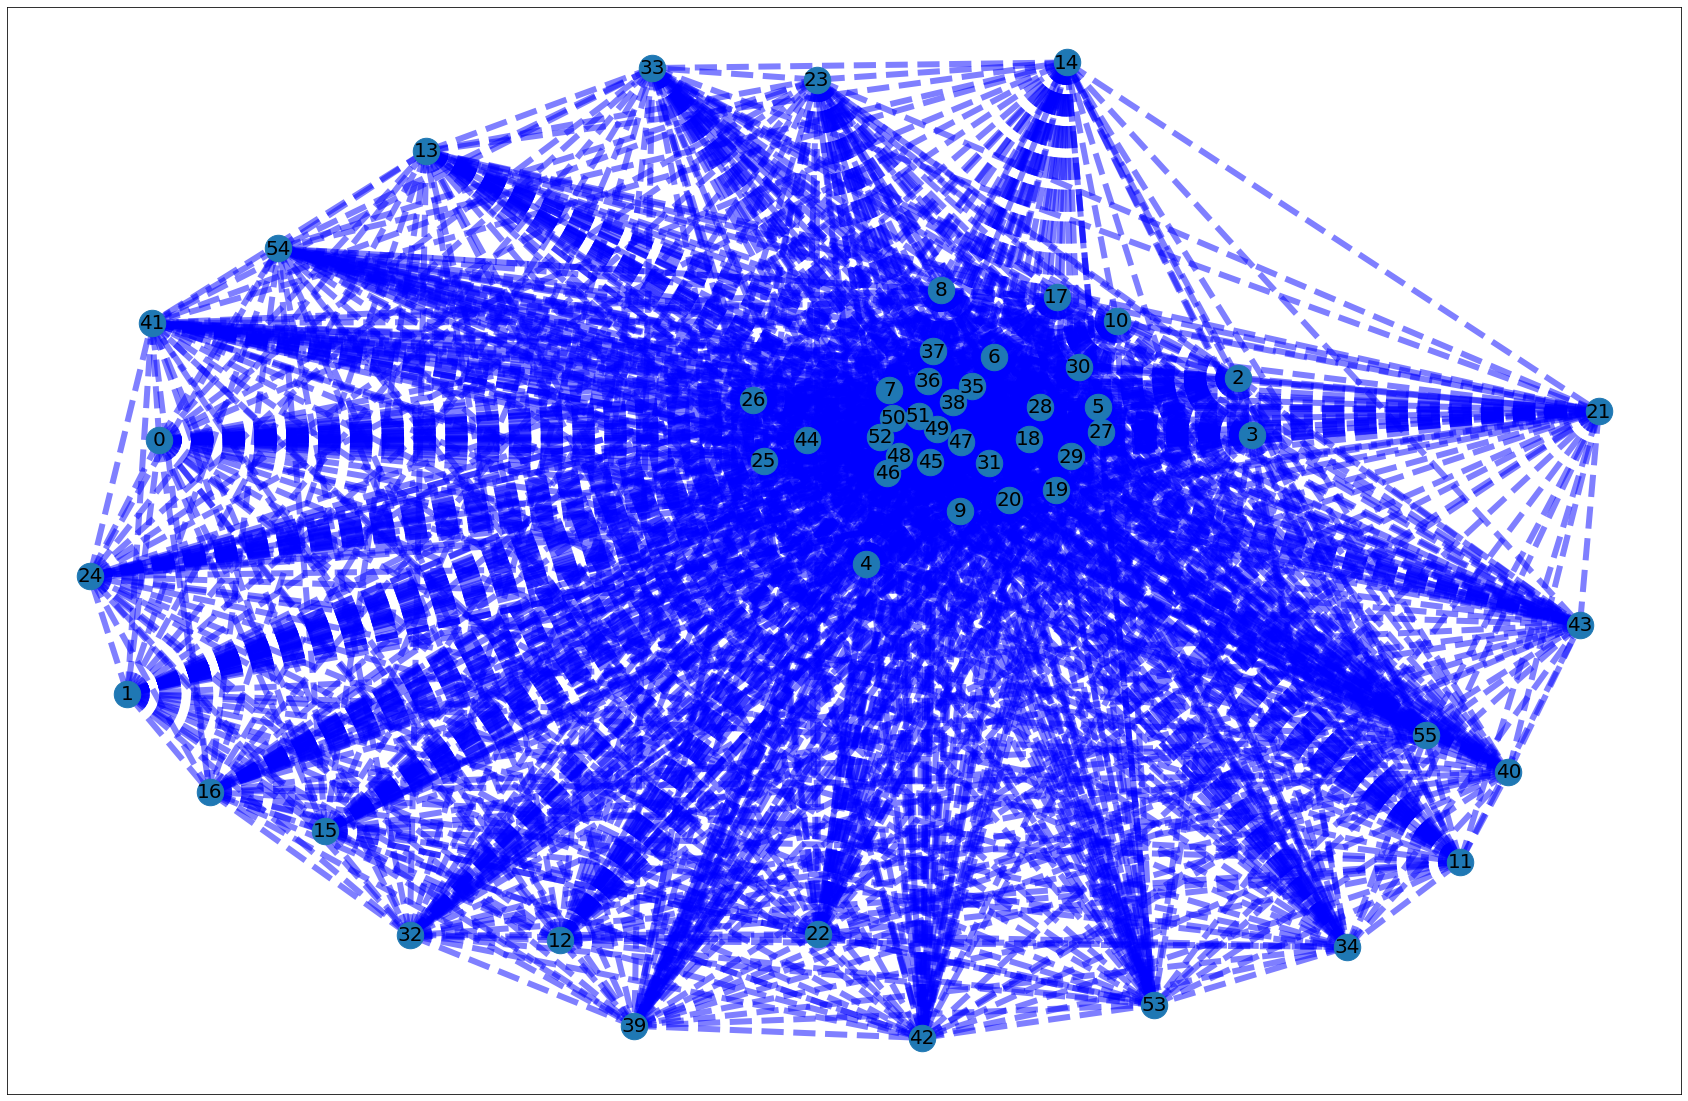

In [8]:
# Differentiating edges by weight, adapted from :
# https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html

elarge = [(u, v) for (u, v, d) in PB_graph.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in PB_graph.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(PB_graph)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(PB_graph, pos, node_size=700)

# edges
nx.draw_networkx_edges(PB_graph, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(PB_graph, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(PB_graph, pos, font_size=20, font_family='sans-serif')
plt.show()